In [1]:
#Packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Objective Function
def obj(x):
    a=x[0]
    b=x[1]
    objective_function_value=a**4+(2/3)*a**3+0.5*a**2-2*a**2*b+(4/3)*b**2
    return objective_function_value

In [3]:
#Gradient
def grad(x):
    a=x[0]
    b=x[1]
    value_1=4*a**3+2*a**2+a-4*a*b
    value_2=(-2)*a**2+(8/3)*b
    gradient=[value_1,value_2]
    return gradient

In [4]:
#Adagrad + Armijo Condition 
def adagrad(x,m):
    x0=x
    sigma=0.5
    gamma=0.1
    tol_GDM=10**(-5)
    itr=0
    error=10**(-6)
    point_set_x=[]
    point_set_y=[]
    grad_set=[grad(x0)]
    x0_former=None
    while grad(x0)[0]**2+grad(x0)[1]**2>tol_GDM**2 and x0_former!=x0:
        alhpa=1
        sum_zero=0
        sum_one=0
        if len(grad_set)<m:
            for i in grad_set:
                sum_zero=sum_zero+i[0]**2
                sum_one=sum_one+i[1]**2
        else:
            for i in grad_set[len(grad_set)-m:]:
                sum_zero=sum_zero+i[0]**2
                sum_one=sum_one+i[1]**2
        k_zero=np.sqrt(error+sum_zero)
        k_one=np.sqrt(error+sum_one)
        k=[x0[0]-alhpa/k_zero*(grad(x0)[0]),x0[1]-alhpa/k_one*(grad(x0)[1])]
        while (obj(k)-obj(x0))>gamma*alhpa*(-((grad(x0)[0]/k_zero)**2+(grad(x0)[1]/k_one)**2)):
            alhpa=alhpa*sigma
            k=[x0[0]-alhpa/k_zero*grad(x0)[0],x0[1]-alhpa/k_one*grad(x0)[1]]
        itr=itr+1
        point_set_x.append(x0[0])
        point_set_y.append(x0[1])
        grad_set.append(grad(x0))
        x0_former=x0
        x0=k
        
    return x0,obj(x0),itr,point_set_x,point_set_y

Question b

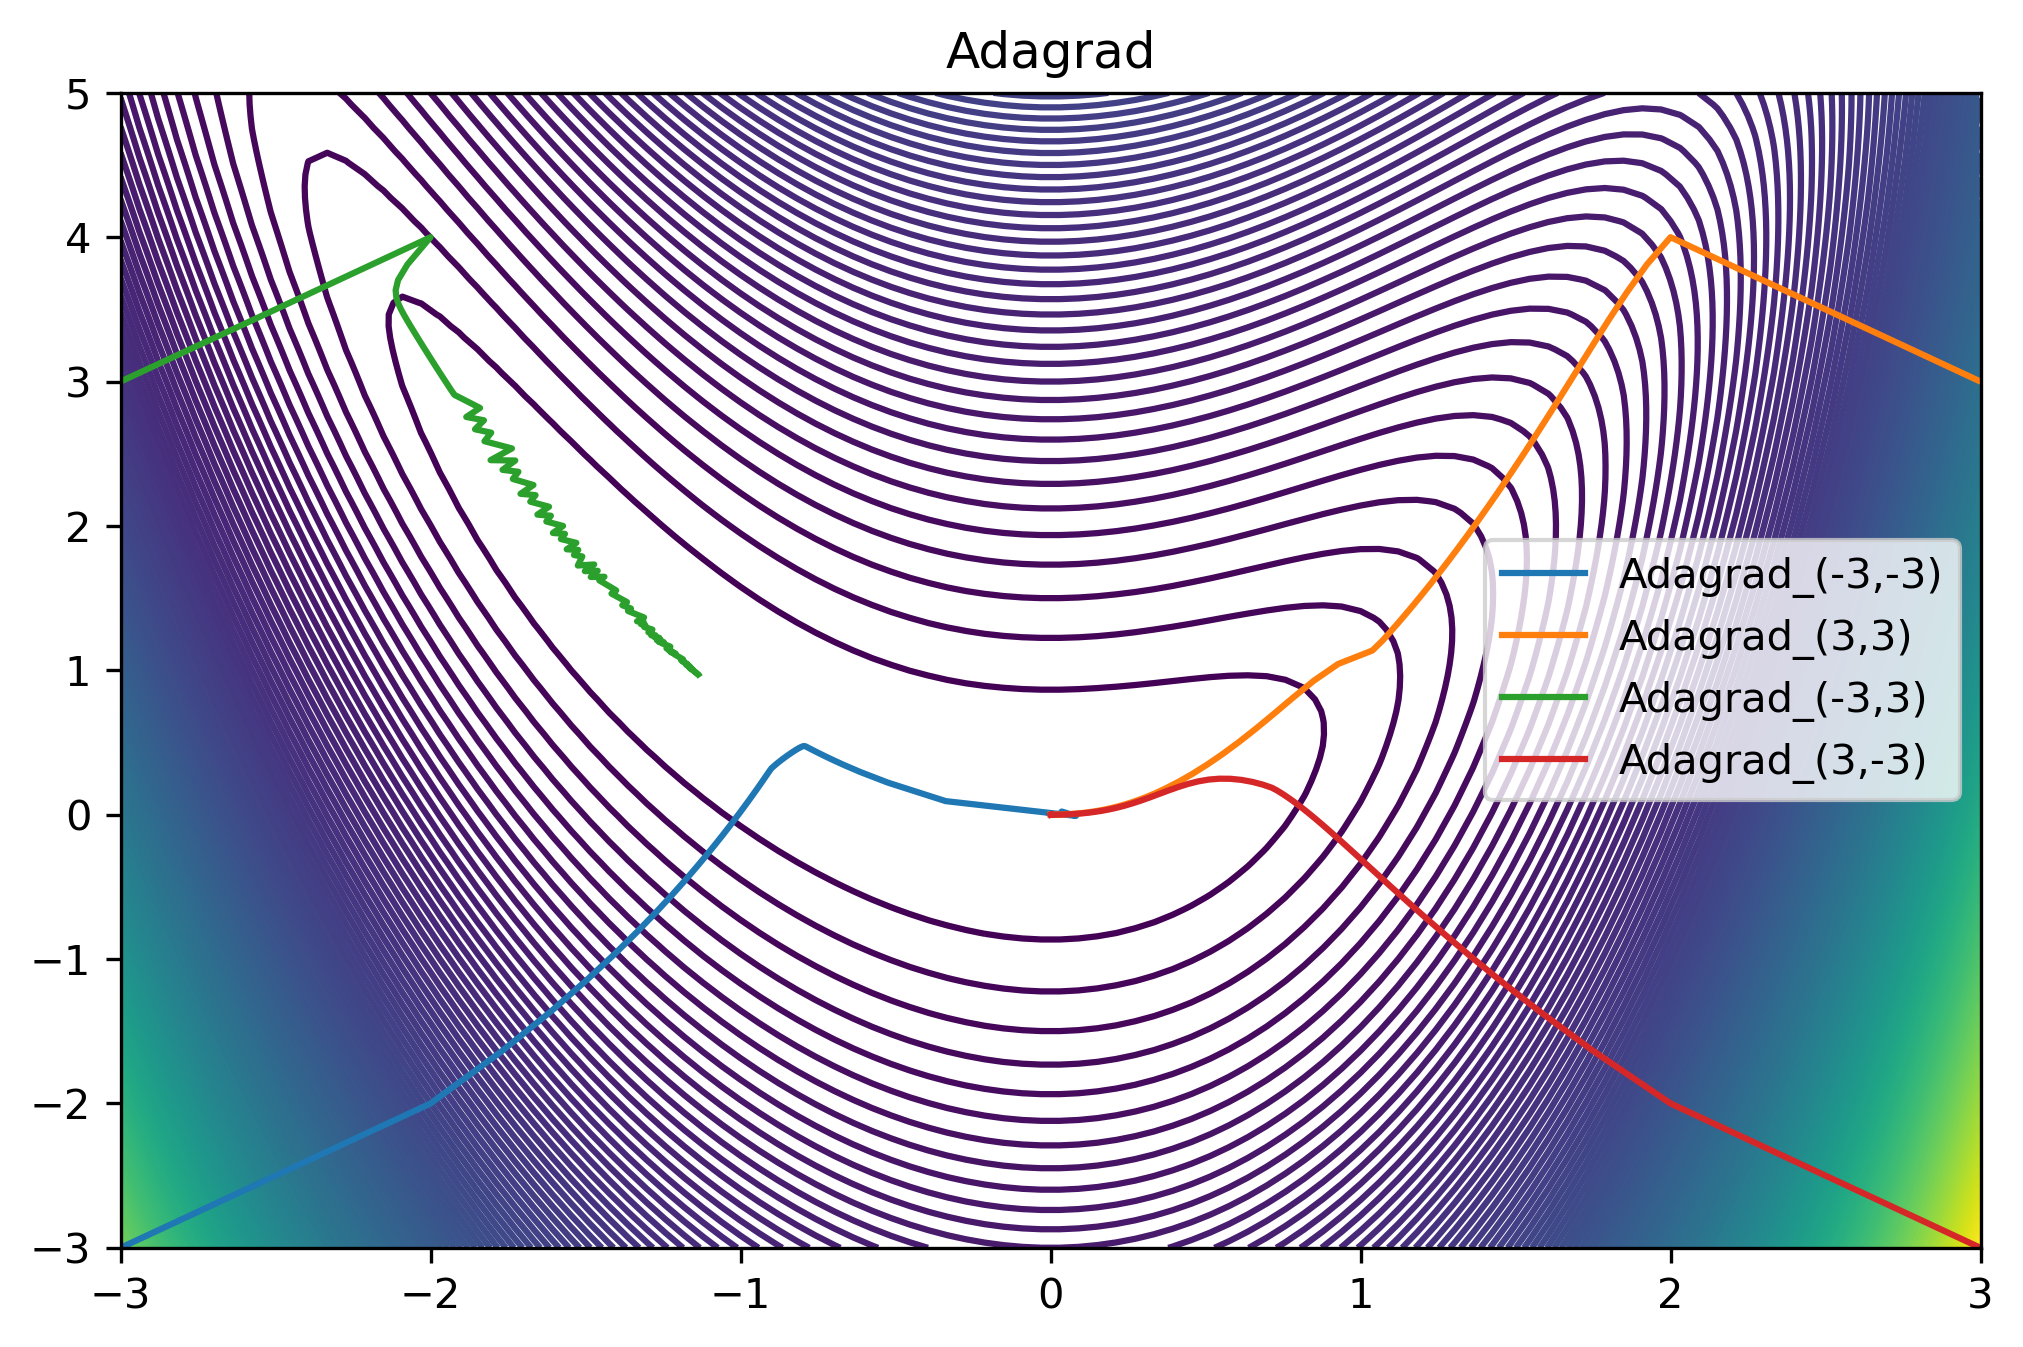

[4.09360940705205e-06, 1.446204513891775e-06] 80
[1.735541155910787e-06, -5.601335057756889e-07] 65
[-1.136169870319309, 0.9719773500231943] 125
[0.0003842630110687778, -0.00014383634515629506] 68


In [5]:
#Adagrad
plt.figure(dpi=300,figsize=(8,5))
plt.title("Adagrad") 
x1=np.linspace(-3,3,100)
x2=np.linspace(-3,5,100)
X,Y=np.meshgrid(x1,x2)
plt.contour(X,Y,obj([X,Y]),200)
a_1=adagrad([-3,-3],25)
a_2=adagrad([3,3],25)
a_3=adagrad([-3,3],25)
a_4=adagrad([3,-3],25)
plt.plot(a_1[3],a_1[4],label='Adagrad_(-3,-3)',color='tab:blue')
plt.plot(a_2[3],a_2[4],label='Adagrad_(3,3)',color='tab:orange')
plt.plot(a_3[3],a_3[4],label='Adagrad_(-3,3)',color='tab:green')
plt.plot(a_4[3],a_4[4],label='Adagrad_(3,-3)',color='tab:red')
plt.legend()
plt.show()
print(a_1[0],a_1[2])
print(a_2[0],a_2[2])
print(a_3[0],a_3[2])
print(a_4[0],a_4[2])

Question c-Methodology

We take initial point = (3,3) as an example, then we explain the relationship between the momories value and the convergence behavior.
(We take m=[5,10,15,25,50] respectively)

[-0.006460063894688512, -2.958799505559343e-05] 28
[-4.650025073732788e-05, 1.4230518077421103e-07] 42
[-5.146190707610126e-06, -8.192486942958099e-07] 53
[4.09360940705205e-06, 1.446204513891775e-06] 80
[-4.793323065794499e-06, -2.358144485021878e-06] 100


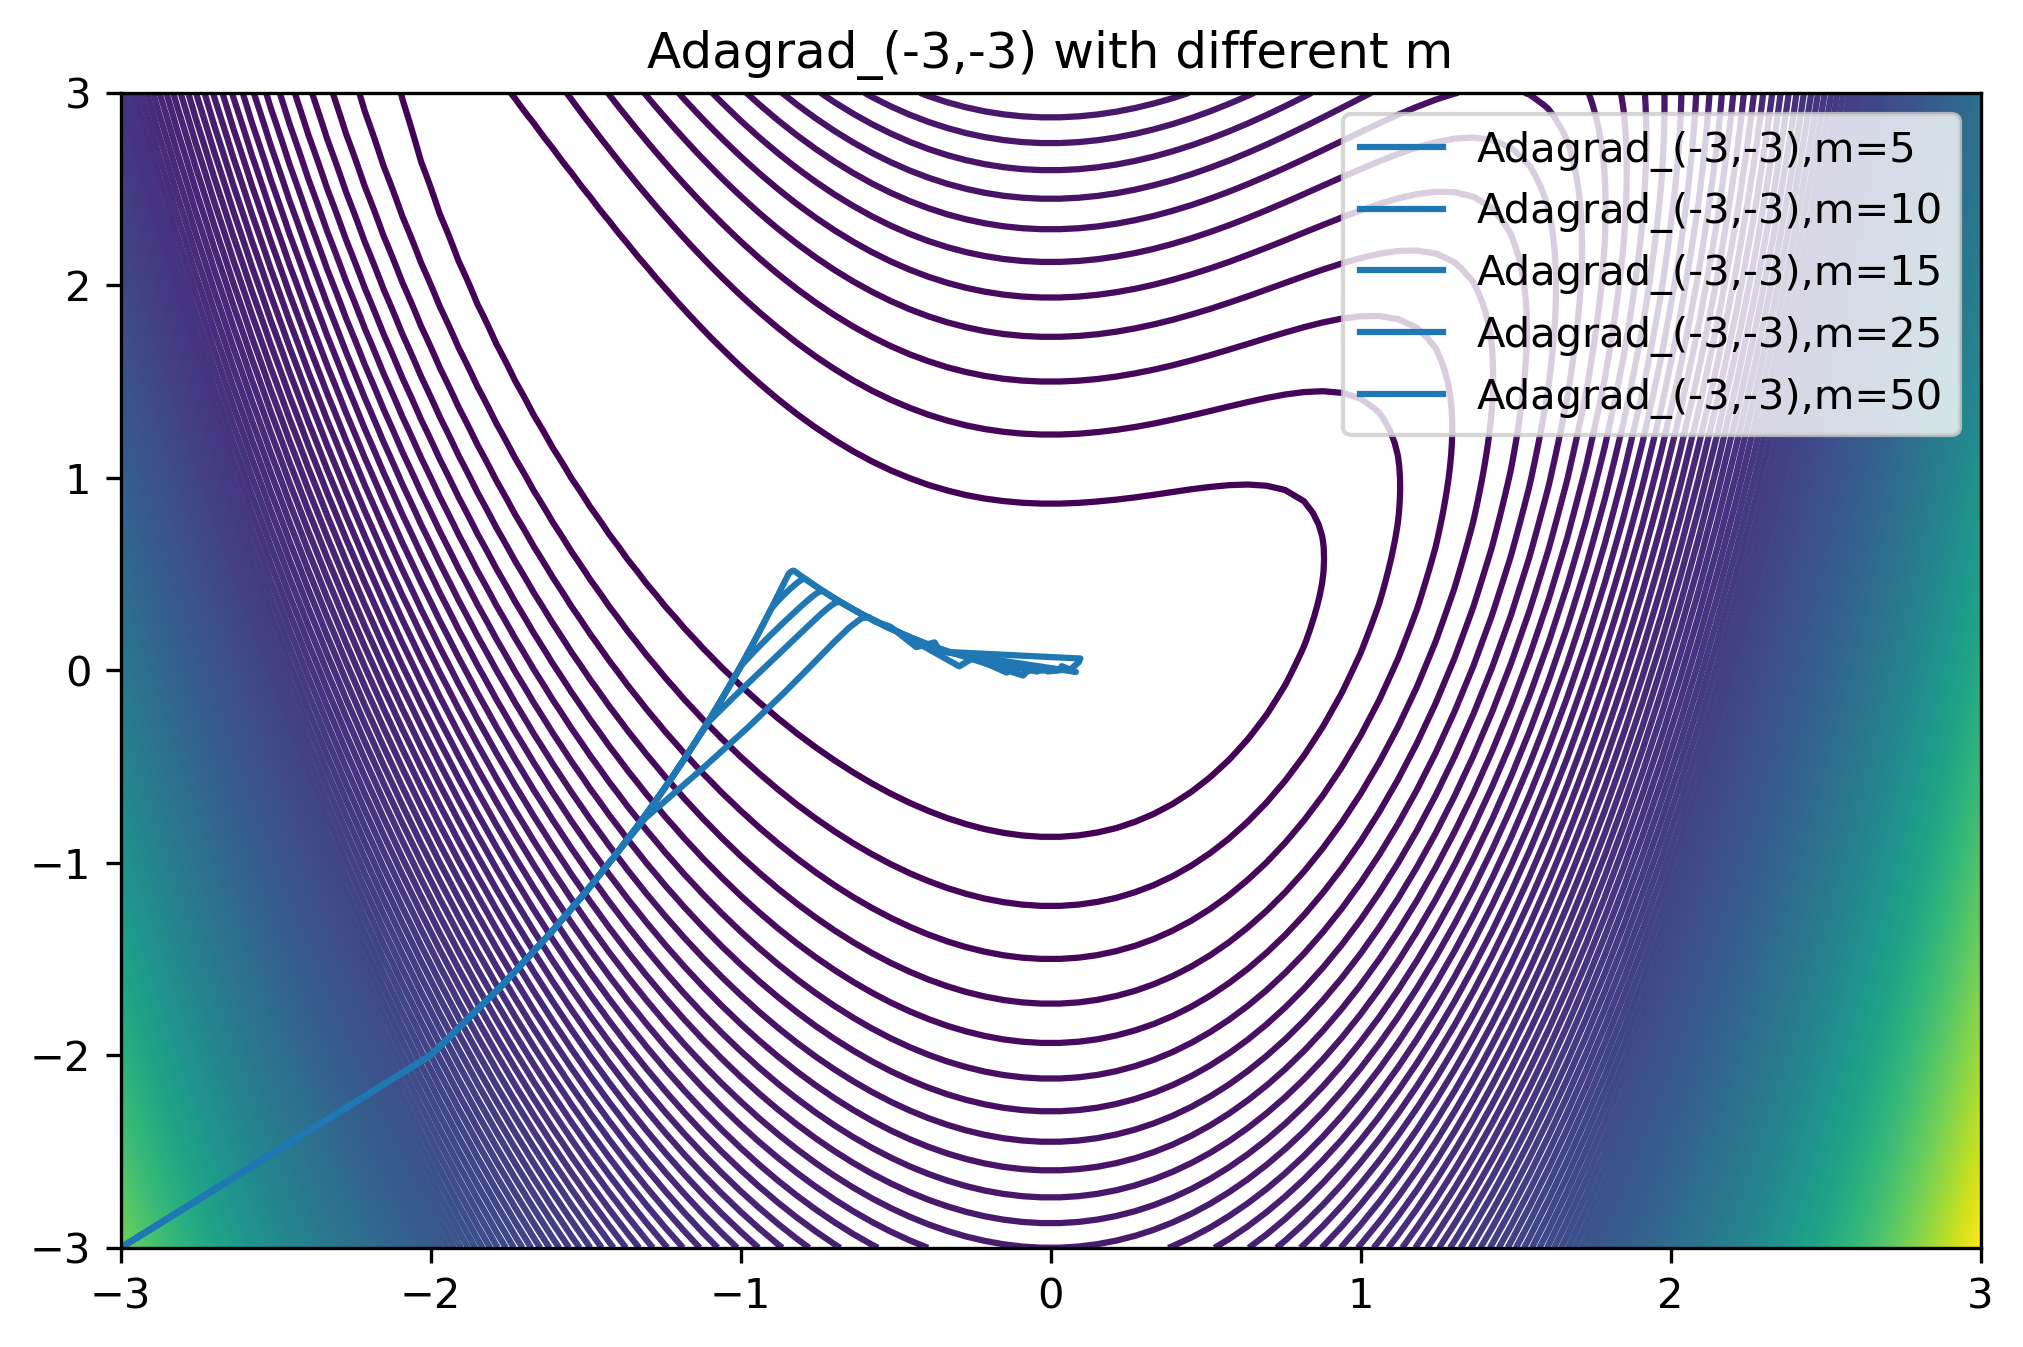

In [6]:
plt.figure(dpi=300,figsize=(8,5))
plt.title("Adagrad_(-3,-3) with different m") 
x1=np.linspace(-3,3,100)
x2=np.linspace(-3,3,100)
X,Y=np.meshgrid(x1,x2)
plt.contour(X,Y,obj([X,Y]),200)
for m in [5,10,15,25,50]:
    a_1=adagrad([-3,-3],m)
    str_m=",m="+str(m)
    plt.plot(a_1[3],a_1[4],label='Adagrad_(-3,-3)'+str_m,color='tab:blue')
    print(a_1[0],a_1[2])
plt.legend()
plt.show()


Question c-Conclusions

*Conclusion 1: As m increases, # of iterations increases;
*Conclusion 2: As m increases, the convergence performance will change correspondingly.